# Project on Drug Prediction
## Project Abstract:
### The data set contains various information that effect the predictions like Age, Sex, BP, Cholesterol levels, Na to Potassium Ratio and finally the drug type.
## Problem Statement:
### To use the given data and to predict which drug is used.

## Dataset Information:
### Each attribute in the dataset is a important factor.
### Column Description:
#### Age:- Age of the Patient
#### Sex:- Gender of the patients
#### BP:- Blood Pressure Levels
#### Cholesterol:- Cholesterol Levels
#### Na_to_K:- Sodium to potassium Ration in Blood
#### Drug:- Drug Type

### 1. Importing Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
%matplotlib inline

### 2. Importing Data:

In [2]:
df=pd.read_csv('drug200.csv')

### 3. EDA:

In [3]:
pd. get_option("display.max_columns")

20

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.shape

(200, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [8]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
df.describe(include="all")

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [10]:
# Checking for missing values in the dataframe
df.isnull().sum() # No missing values are present in the Dataframe

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<AxesSubplot:>

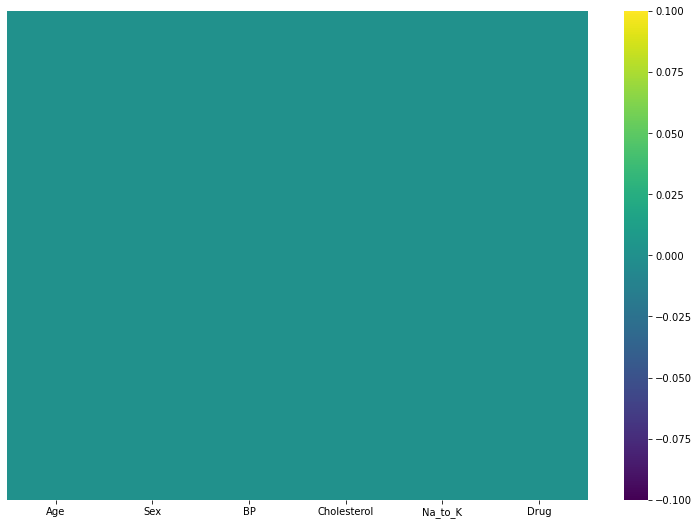

In [11]:
# Checking Visually for missing values
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:>

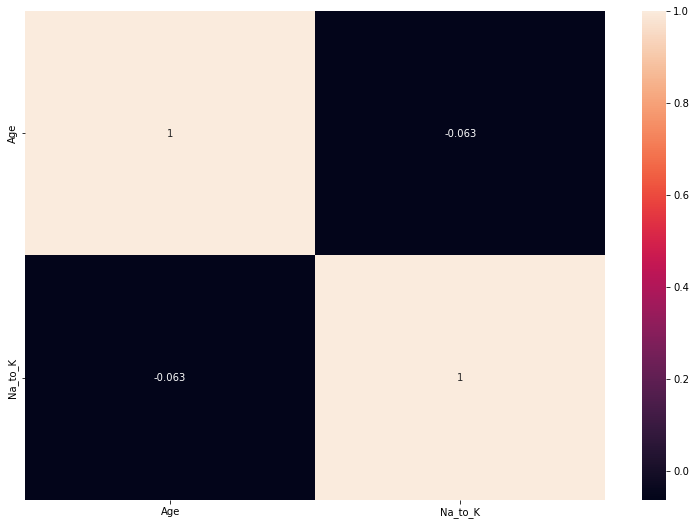

In [12]:
# Getting the correlation of the dataframe visually
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.corr(),annot=True)

In [13]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


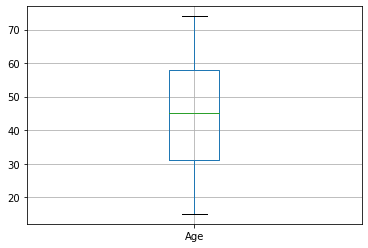

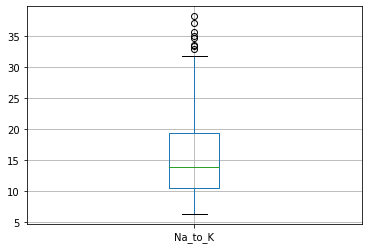

In [14]:
# Checking for Outliers via visualization:
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        plt.figure()
        df.boxplot([col])
        plt.show()

In [15]:
# Dealing with Outliers:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df=cap_data(df)

capping the  Age
capping the  Sex
capping the  BP
capping the  Cholesterol
capping the  Na_to_K
capping the  Drug


C:\Users\roshs\AppData\Local\Temp/ipykernel_7688/1692076479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\roshs\AppData\Local\Temp/ipykernel_7688/1692076479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]


In [16]:
# Label Encoding on Catagorical columns:
df_encoded=df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype=='object':
        df_encoded[col]=df_encoded[col].astype('category')
        df_encoded[col]=df_encoded[col].cat.codes
df=df_encoded
df_encoded.head()
# Encoding done.

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


<AxesSubplot:>

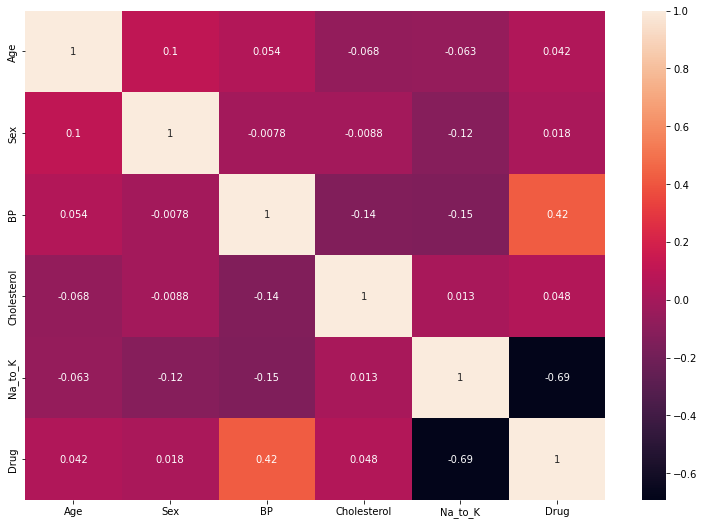

In [17]:
# Checking for data correlation visually
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.corr(),annot=True)

## The dataframe has a unique form of correlation

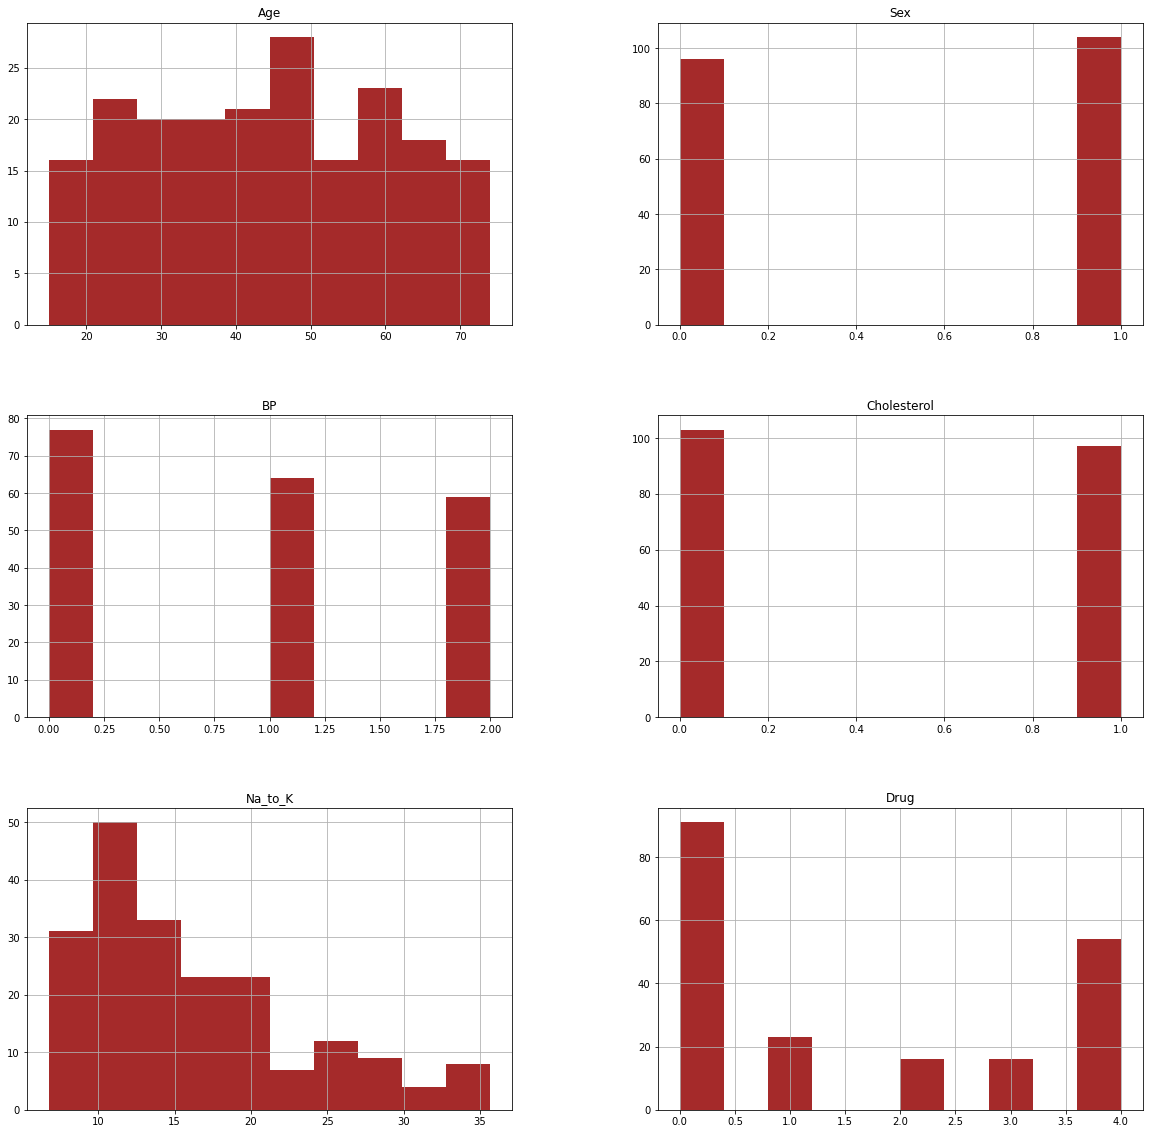

In [18]:
# Visualization of features to check the spread of data:
fig = df.hist(figsize = (20,20),color="brown")

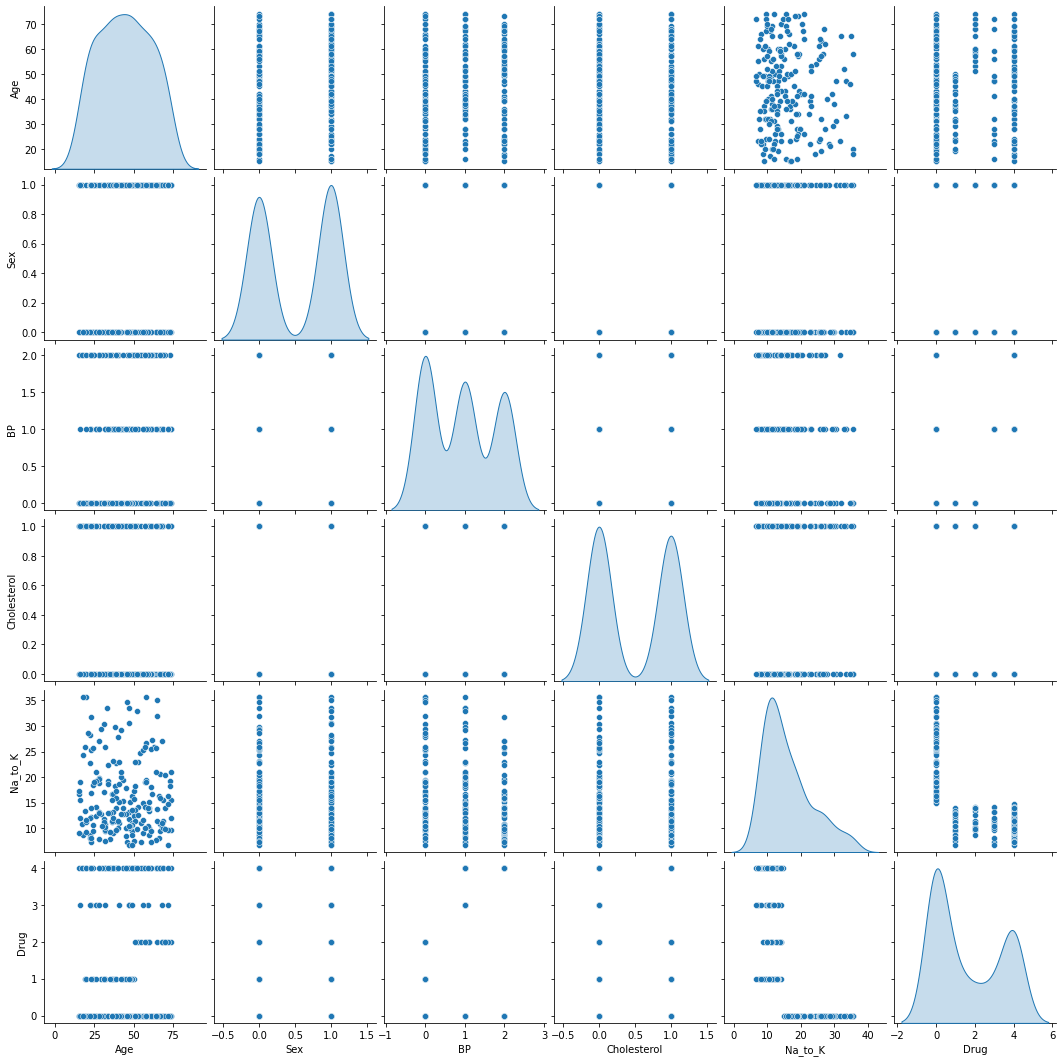

In [19]:
# Visualization of features to check the spread of data:
sns.pairplot(df,diag_kind='kde')

### 4. Data Splitting:

In [20]:
# Data splitting
x=df_encoded.drop(labels=['Drug'],axis=1)
y=df["Drug"]

### 5. Random Forest Model Build:

In [23]:
rf = RandomForestClassifier(n_estimators = 50)

### #6.1 Without Scaling:

In [25]:
# Train & Test Spliting
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25)

In [26]:
# Model Fitting
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [27]:
# Accuracy Testing
rftr=rf.score(x_train,y_train)
print('Train Score:',rftr)
rfte=rf.score(x_test,y_test)
print('Test Score: ',rfte)

Train Score: 1.0
Test Score:  0.98


## This is a decent model, we must proceed with other models with scaling for more accuracy.

### #6.2 With Standard Scaling:

In [28]:
# Standard Scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.29159102, -1.040833  , -1.11016894, -0.97043679,  1.30041068],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.41634769],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.83342672],
       [-0.988614  , -1.040833  ,  1.32976279, -0.97043679, -1.15768152],
       [ 1.0110343 , -1.040833  ,  0.10979693, -0.97043679,  0.27668395],
       [-1.35218642, -1.040833  ,  1.32976279, -0.97043679, -1.04441635],
       [ 0.28388946, -1.040833  ,  1.32976279, -0.97043679,  0.02915265],
       [-0.20087376,  0.96076892,  0.10979693, -0.97043679, -0.70420083],
       [ 0.9504389 ,  0.96076892,  1.32976279, -0.97043679, -0.12541441],
       [-0.07968296,  0.96076892,  0.10979693,  1.03046381,  0.46219241],
       [ 0.16269866, -1.040833  ,  0.10979693, -0.97043679, -0.60199616],
       [-0.62504158, -1.040833  , -1.11016894,  1.03046381,  0.43853133],
       [-0.07968296,  0.96076892,  0.10979693, -0.97043679, -0.0967131 ],
       [ 1.79877454, -1.040833  ,  0.1

In [29]:
# Train & Test Spliting
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=0)

In [30]:
# Model Fitting
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [31]:
# Accuracy Testing
rftrs=rf.score(x_train,y_train)
print('Train Score:',rftrs)
rftes=rf.score(x_test,y_test)
print('Test Score: ',rftes)

Train Score: 1.0
Test Score:  1.0


## This model is perfect one, we can proceed with other models with scaling confirmation.

### #6.3 With Min Max Scaling:

In [32]:
# Min Max Scaling
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[1.35593220e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.43447857e-01],
       [5.42372881e-01, 1.00000000e+00, 5.00000000e-01, 0.00000000e+00,
        2.18956704e-01],
       [5.42372881e-01, 1.00000000e+00, 5.00000000e-01, 0.00000000e+00,
        1.15828410e-01],
       [2.20338983e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        3.56521333e-02],
       [7.79661017e-01, 0.00000000e+00, 5.00000000e-01, 0.00000000e+00,
        3.90317918e-01],
       [1.18644068e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        6.36584408e-02],
       [5.76271186e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        3.29112539e-01],
       [4.40677966e-01, 1.00000000e+00, 5.00000000e-01, 0.00000000e+00,
        1.47781218e-01],
       [7.62711864e-01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        2.90893796e-01],
       [4.74576271e-01, 1.00000000e+00, 5.00000000e-01, 1.00000000e+00,
        4.36187334e-01],
       [5.42372881e-01, 0.0000

In [33]:
# Train & Test Spliting
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=0)

In [34]:
# Model Fitting
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [35]:
# Accuracy Testing
rftrm=rf.score(x_train,y_train)
print('Train Score:',rftrm)
rftem=rf.score(x_test,y_test)
print('Test Score: ',rftem)

Train Score: 1.0
Test Score:  1.0


## This model is perfect one, we can proceed with other models with scaling confirmation.

### #6.4 With Robust Scaling:

In [36]:
# Robust Scaling
scaler=RobustScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-8.14814815e-01, -1.00000000e+00, -5.00000000e-01,
         0.00000000e+00,  1.27802339e+00],
       [ 7.40740741e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -9.44093122e-02],
       [ 7.40740741e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -4.27835917e-01],
       [-6.29629630e-01, -1.00000000e+00,  5.00000000e-01,
         0.00000000e+00, -6.87055795e-01],
       [ 5.92592593e-01, -1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.59622810e-01],
       [-8.51851852e-01, -1.00000000e+00,  5.00000000e-01,
         0.00000000e+00, -5.96507919e-01],
       [ 1.48148148e-01, -1.00000000e+00,  5.00000000e-01,
         0.00000000e+00,  2.61738206e-01],
       [-1.48148148e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.24528513e-01],
       [ 5.55555556e-01,  0.00000000e+00,  5.00000000e-01,
         0.00000000e+00,  1.38172254e-01],
       [-7.40740741e-02,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00

In [37]:
# Train & Test Spliting
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=0)

In [38]:
# Model Fitting
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [39]:
# Accuracy Testing
rftrr=rf.score(x_train,y_train)
print('Train Score:',rftrr)
rfter=rf.score(x_test,y_test)
print('Test Score: ',rfter)

Train Score: 1.0
Test Score:  1.0


## This model is perfect one, we can proceed with other models with scaling confirmation.

### 7. Conclusion:

In [40]:
print('Random Forest Model Without Scaling:')
print('Train Score:',rftr)
print('Test Score: ',rfte)
print('Random Forest Model With Standard Scaling:')
print('Train Score:',rftrs)
print('Test Score: ',rftes)
print('Random Forest Model With Min Max Scaling:')
print('Train Score:',rftrm)
print('Test Score: ',rftem)
print('Random Forest Model With Robust Scaling:')
print('Train Score:',rftrr)
print('Test Score: ',rfter)

Random Forest Model Without Scaling:
Train Score: 1.0
Test Score:  0.98
Random Forest Model With Standard Scaling:
Train Score: 1.0
Test Score:  1.0
Random Forest Model With Min Max Scaling:
Train Score: 1.0
Test Score:  1.0
Random Forest Model With Robust Scaling:
Train Score: 1.0
Test Score:  1.0


# Conclusion:
## All the models seems to be decent and perfect, with moreover the same scores, we can go with the model with standard scaling since it is simpler than others.
# Project Completed Successfully